# SMOKERS STATUS PREDICTION 

![](image.png)

## English


This dataset provides information about health and physical condition measurements. Each row contains essential medical and biometric measurements for an individual, including:

	1.	Physical parameters: Age, height, weight, waist circumference.
	2.	Vision and hearing ability: Separate indicators for both eyes and ears.
	3.	Blood pressure: Systolic and diastolic blood pressure.
	4.	Blood composition and health indicators:
	•	Blood sugar and cholesterol levels: Fasting blood sugar, HDL, LDL, and total cholesterol.
	•	Liver enzymes: Indicators like AST, ALT, and GTP.
	•	Hemoglobin and creatinine: Hemoglobin is an oxygen-carrying substance in the blood, while creatinine is used to assess kidney function.
	5.	Smoking and dental health: Smoking status and presence of dental caries.

This type of dataset is typically used to assess people’s health status and predict the risk of various diseases. In this model, we aim to predict whether an individual smokes or not.


## Russian



Этот набор данных содержит информацию об измерениях здоровья и физического состояния. Каждая строка содержит основные медицинские и биометрические показатели для человека, включая:

	1.	Физические параметры: Возраст, рост, вес, окружность талии.
	2.	Зрение и слух: Отдельные показатели для обоих глаз и ушей.
	3.	Артериальное давление: Систолическое и диастолическое давление.
	4.	Состав крови и показатели здоровья:
	•	Уровень сахара в крови и холестерина: Уровень сахара натощак, HDL, LDL и общий холестерин.
	•	Ферменты печени: Показатели, такие как AST, ALT и GTP.
	•	Гемоглобин и креатинин: Гемоглобин переносит кислород в крови, а креатинин используется для оценки функции почек.
	5.	Курение и здоровье зубов: Статус курения и наличие кариеса.

Такой тип набора данных обычно используется для оценки состояния здоровья людей и прогнозирования риска различных заболеваний. В этой модели мы стремимся предсказать, курит человек или нет.

## Uzbek




Bu dataset sog’liqni saqlash va jismoniy holat o’lchovlari haqida ma’lumot beradi. Har bir qatorda shaxsning asosiy tibbiy va biometrik o’lchovlari mavjud, shu jumladan:

	1.	Jismoniy parametrlar: Yoshi, bo’yi, og’irligi, bel o’lchami.
	2.	Ko’rish va eshitish qobiliyati: Har ikki ko’z va quloq uchun alohida ko’rsatkichlar.
	3.	Qon bosimi: Sistolik va diastolik qon bosimi.
	4.	Qon tarkibi va sog’liq ko’rsatkichlari:
	•	Qondagi qand va xolesterin miqdori: Fasting blood sugar, HDL, LDL va umumiy xolesterin.
	•	Jigar fermentlari: AST, ALT, Gtp kabi ko’rsatkichlar.
	•	Gemoglobin va kreatinin: Gemoglobin qondagi kislorod tashuvchi moddadir, kreatinin esa buyraklar faoliyatini baholash uchun ishlatiladi.
	5.	Chekish va tish sog’lig’i: Chekish holati va tish kariesining mavjudligi.

Bu turdagi dataset odatda odamlarning sog’liq holatini baholash va kasallik xavfini bashorat qilish uchun ishlatiladi. Bu modelda biz uning chekishi yoki chekmasligini bashorat qilamiz.

### Datasetdagi mavjud ustunlar

1. id: Shaxs identifikatori
2. age: Yoshi
3. height(cm): Bo'yi (sm)
4. weight(kg): Og'irligi (kg)
5. waist(cm): Bel o'lchami (sm)
6. eyesight(left): Chap ko'z ko'rish qobiliyati
7. eyesight(right): O'ng ko'z ko'rish qobiliyati
8. hearing(left): Chap quloq eshitish qobiliyati
9. hearing(right): O'ng quloq eshitish qobiliyati
10. systolic: Sistolik qon bosimi
11. relaxation: Diastolik qon bosimi (yoki dam olish paytidagi bosim)
12. fasting blood sugar: Och qoringa olingan qondagi qand miqdori
13. Cholesterol: Xolesterin miqdori
14. triglyceride: Triglitserid miqdori
15. HDL: Yaxshi xolesterin
16. LDL: Yomon xolesterin
17. hemoglobin: Gemoglobin miqdori
18. Urine protein: Siydikdagi oqsil darajasi
19. serum creatinine: Qon zardobidagi kreatinin miqdori
20. AST: Jigar fermenti (aspartat aminotransferaza)
21. ALT: Jigar fermenti (alanin aminotransferaza)
22. Gtp: Jigar fermenti (gamma-glutamil transferaza)
23. dental caries: Tish kariesi mavjudligi
24. smoking: Chekish holati


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
import optuna
from sklearn.model_selection import learning_curve


In [4]:
w.filterwarnings('ignore')

### train data

In [5]:
train_df=pd.read_csv('train.csv')
train_df=train_df.drop('id', axis=1)
train_df.head(3)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0


### test data

In [6]:
test_df=pd.read_csv('test.csv')
test_df=test_df.drop('id', axis=1)
test_df.head(3)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40.0,175.0,70.0,84.0,1.5,1.5,1.0,1.0,120.0,59.0,...,122.0,45.0,109.0,16.0,1.0,1.0,15.0,9.0,25.0,0.0
1,45.0,155.0,55.0,72.4,0.6,0.5,1.0,1.0,102.0,68.0,...,104.0,56.0,109.0,11.5,1.0,0.8,14.0,10.0,13.0,0.0
2,40.0,160.0,55.0,76.0,1.2,1.2,1.0,1.0,115.0,64.0,...,84.0,77.0,74.0,13.3,1.0,0.8,14.0,10.0,11.0,0.0


### Correlation columns with 'smoking' column

In [123]:
smokin_corr = train_df.corr()['smoking'].to_frame().T
smokin_corr.style.background_gradient(cmap='coolwarm') 

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
smoking,-0.193103,0.494092,0.399787,0.300887,0.128234,0.134564,-0.007418,-0.002186,0.123260,0.152125,0.103526,-0.034782,0.345541,-0.290750,-0.035665,0.503442,-0.008566,0.351120,0.101480,0.241721,0.377667,0.148421,1.000000


### split data to X and y. X=feature data, y=target data.

In [7]:
X=train_df.drop('smoking', axis=1)  
y=train_df['smoking']

### LogisticRegression model

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy)
y_prob_tree = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob_tree)
print("ROC AUC Score:", auc_score)

Accuracy: 0.7613333333333333
ROC AUC Score: 0.8489779395154323


### Decision Tree model

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

Accuracy: 0.785
ROC AUC Score: 0.8489779395154323


### random forest model with optuna

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score  
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best parameters found by Optuna:", study.best_params)
print("Best AUC score achieved:", study.best_value)
best_params = study.best_params
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)
y_prob = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("Final Model ROC AUC Score:", auc_score)


[I 2024-10-26 18:32:02,954] A new study created in memory with name: no-name-d53e6bce-7369-4aa7-b6b7-33ac2e257bc2
[I 2024-10-26 18:32:08,434] Trial 0 finished with value: 0.8810938742812451 and parameters: {'n_estimators': 67, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.8810938742812451.
[I 2024-10-26 18:32:10,909] Trial 1 finished with value: 0.8866232328927312 and parameters: {'n_estimators': 141, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8866232328927312.
[I 2024-10-26 18:32:13,533] Trial 2 finished with value: 0.8826571484436545 and parameters: {'n_estimators': 225, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.8866232328927312.
[I 2024-10-26 18:32:15,144] Trial 3 finished with value: 0.8840965566205182 and parameters: {'n_estimators': 109, 'max_depth': 30, 'min_

Best parameters found by Optuna: {'n_estimators': 175, 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best AUC score achieved: 0.8876317203229438
Final Model Accuracy: 0.802
Final Model ROC AUC Score: 0.8876317203229438


### Best parameters found by Optuna:
#### n_estimators=250, 'max_depth': 28, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2'

### roc curve for model with optuna

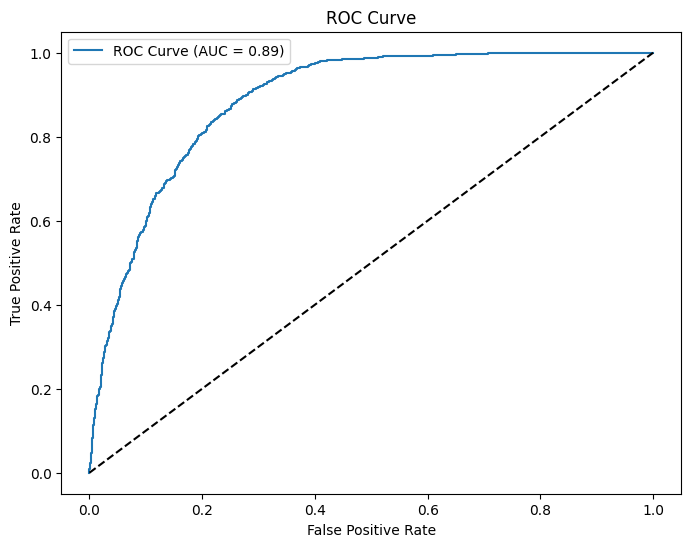

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Random Forest model

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=250, max_depth=28, min_samples_split=16,min_samples_leaf=3, max_features='log2',random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_prob = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

Accuracy: 0.803
ROC AUC Score: 0.8878524011017903


### roc curve plot

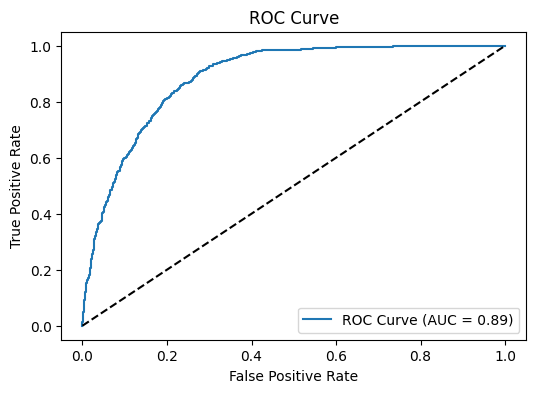

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Learning curves

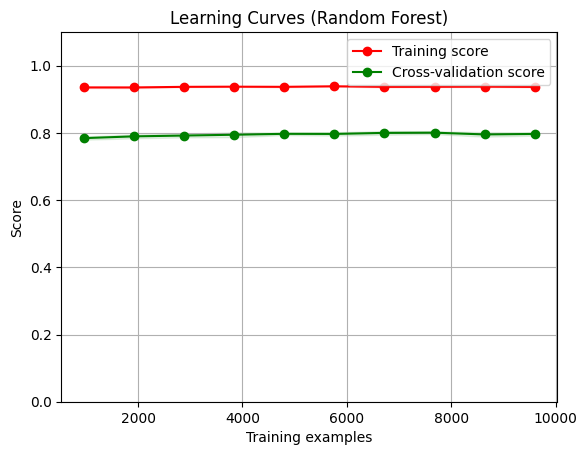

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=250, max_depth=28, min_samples_split=16,min_samples_leaf=3, max_features='log2',random_state=42)
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                        cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()


In [134]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=250, max_depth=28, min_samples_split=16,
                                   min_samples_leaf=3, max_features='log2', random_state=42)
rf_model.fit(X_train, y_train)
calibrated_model = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train)
y_pred = calibrated_model.predict(X_test)
y_prob = calibrated_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)

Accuracy: 0.8
ROC AUC Score: 0.8878524011017903


In [145]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import class_weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}
rf_model = RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_split=10,
                                   min_samples_leaf=2, max_features='sqrt', random_state=42,
                                   class_weight=class_weights)
rf_model.fit(X_train, y_train)
calibrated_model = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train)
y_pred = calibrated_model.predict(X_test)
y_prob = calibrated_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)


Accuracy: 0.8026666666666666
ROC AUC Score: 0.8872881227231915


In [146]:
y_prob_t = calibrated_model.predict_proba(test_df)[:, 1]
y_prob_t

array([9.82346715e-01, 1.52189522e-05, 2.18066239e-05, ...,
       5.59585887e-03, 2.81063139e-05, 5.93805357e-01])

In [147]:
subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_prob_t
subm.to_csv("sixth_submission.csv", index=False)

In [148]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )
    roc_auc = cross_val_score(rf, X_train, y_train, cv=3, scoring="roc_auc", n_jobs=-1).mean()
    return roc_auc
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
best_params = study.best_params
print("Best hyperparameters:", best_params)
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap'],
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_prob = best_rf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


[I 2024-10-26 18:57:33,657] A new study created in memory with name: no-name-56eef7bd-16de-41f4-9c85-fd465f4897e7
[I 2024-10-26 18:57:41,289] Trial 0 finished with value: 0.8822082424395101 and parameters: {'n_estimators': 311, 'max_depth': 48, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8822082424395101.
[I 2024-10-26 18:57:44,018] Trial 1 finished with value: 0.8813064776528465 and parameters: {'n_estimators': 157, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8822082424395101.
[I 2024-10-26 18:57:46,397] Trial 2 finished with value: 0.8499096414269235 and parameters: {'n_estimators': 360, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8822082424395101.
[I 2024-10-26 18:57:52,307] Trial 3 finished with value: 0.8776940781252293

Best hyperparameters: {'n_estimators': 410, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}
Accuracy: 0.7996666666666666
ROC AUC Score: 0.887315173915437


In [149]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class MultiplyColumns(BaseEstimator, TransformerMixin):
    def __init__(self, col1_idx=0, col2_idx=1):  # Indices of columns to multiply
        self.col1_idx = col1_idx
        self.col2_idx = col2_idx
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_new = X.copy()
        new_col = X_new[:, self.col1_idx] * X_new[:, self.col2_idx]
        X_new = np.hstack([X_new, new_col.reshape(-1, 1)])  
        return X_new

def create_pipeline(n_estimators, max_depth, min_samples_split):
    pipeline = Pipeline([
        ('multiply', MultiplyColumns(col1_idx=0, col2_idx=1)), 
        ('rf', RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split, 
            random_state=42))
    ])
    return pipeline

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    pipeline = create_pipeline(n_estimators, max_depth, min_samples_split)
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score


### With Pipeline

In [152]:
class MultiplyColumns(BaseEstimator, TransformerMixin):
    def __init__(self, col1_idx=0, col2_idx=1):
        self.col1_idx = col1_idx
        self.col2_idx = col2_idx
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            new_col = X.iloc[:, self.col1_idx] * X.iloc[:, self.col2_idx]
            X_new = X.copy()
            X_new['new_column'] = new_col  
            return X_new
        else:
            X_new = X.copy()
            new_col = X_new[:, self.col1_idx] * X_new[:, self.col2_idx]
            return np.hstack([X_new, new_col.reshape(-1, 1)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def create_pipeline(n_estimators, max_depth, min_samples_split):
    pipeline = Pipeline([
        ('multiply', MultiplyColumns(col1_idx=0, col2_idx=1)),  
        ('rf', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42))
    ])
    return pipeline

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    pipeline = create_pipeline(n_estimators, max_depth, min_samples_split)
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_params)
best_pipeline = create_pipeline(**study.best_params)
best_pipeline.fit(X_train, y_train)

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC-AUC: {roc_auc:.4f}")


[I 2024-10-26 19:02:17,183] A new study created in memory with name: no-name-3f3b9b5b-6969-4ba0-9433-a21dbc261537
[I 2024-10-26 19:02:21,594] Trial 0 finished with value: 0.8798035999704371 and parameters: {'n_estimators': 59, 'max_depth': 15, 'min_samples_split': 6}. Best is trial 0 with value: 0.8798035999704371.
[I 2024-10-26 19:02:33,092] Trial 1 finished with value: 0.8820402370715879 and parameters: {'n_estimators': 145, 'max_depth': 19, 'min_samples_split': 4}. Best is trial 1 with value: 0.8820402370715879.
[I 2024-10-26 19:02:38,844] Trial 2 finished with value: 0.87959628551016 and parameters: {'n_estimators': 71, 'max_depth': 28, 'min_samples_split': 4}. Best is trial 1 with value: 0.8820402370715879.
[I 2024-10-26 19:02:44,627] Trial 3 finished with value: 0.8806194947260606 and parameters: {'n_estimators': 76, 'max_depth': 27, 'min_samples_split': 9}. Best is trial 1 with value: 0.8820402370715879.
[I 2024-10-26 19:02:59,362] Trial 4 finished with value: 0.8831410865606927

Best Parameters: {'n_estimators': 196, 'max_depth': 27, 'min_samples_split': 9}
Test ROC-AUC: 0.8856


## Stacking ensemble (Best model)

In [153]:
import optuna
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    rf_model.fit(X_train, y_train)
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score

study = optuna.create_study(direction='maximize')
study.optimize(rf_objective, n_trials=50)

best_rf_params = study.best_params
rf_model_optimized = RandomForestClassifier(**best_rf_params, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
meta_model = LogisticRegression()

stacking_ensemble = StackingClassifier(
    estimators=[('rf', rf_model_optimized), ('dt', dt_model)],
    final_estimator=meta_model,
    cv=5
)

stacking_ensemble.fit(X_train, y_train)

y_pred = stacking_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)
y_prob = stacking_ensemble.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("Final Model ROC AUC Score:", auc_score)

[I 2024-10-27 17:16:37,260] A new study created in memory with name: no-name-9ec18398-f844-4b6d-9ef8-18f548d793a6
[I 2024-10-27 17:16:40,732] Trial 0 finished with value: 0.8850784674408053 and parameters: {'n_estimators': 230, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8850784674408053.
[I 2024-10-27 17:16:43,879] Trial 1 finished with value: 0.8841995409839801 and parameters: {'n_estimators': 210, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 14, 'max_features': 'log2'}. Best is trial 0 with value: 0.8850784674408053.
[I 2024-10-27 17:16:45,354] Trial 2 finished with value: 0.8840472000592279 and parameters: {'n_estimators': 97, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 0 with value: 0.8850784674408053.
[I 2024-10-27 17:16:48,126] Trial 3 finished with value: 0.8831113237239905 and parameters: {'n_estimators': 201, 'max_depth': 10,

Final Model Accuracy: 0.8003333333333333
Final Model ROC AUC Score: 0.8883191528136087


In [155]:
y_prob_test = stacking_ensemble.predict_proba(test_df)[:, 1]


In [156]:
subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_prob_test
subm.to_csv("submission.csv", index=False)

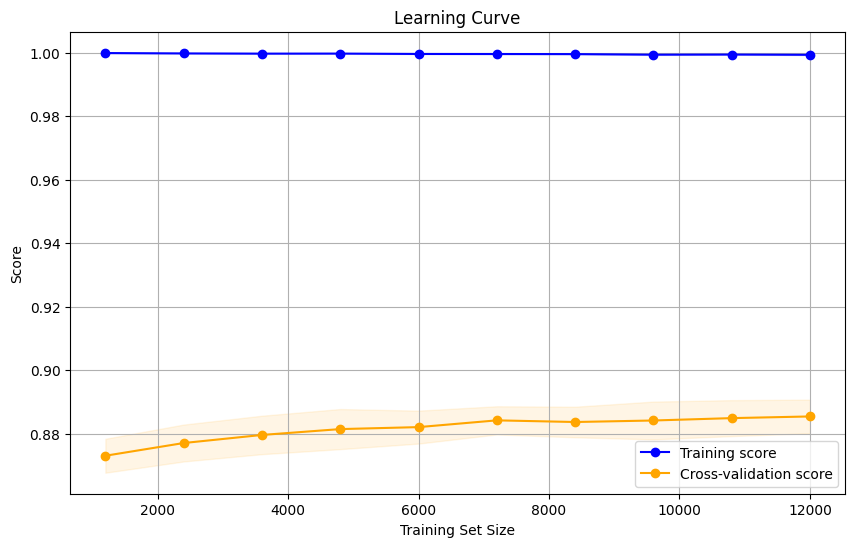

In [157]:

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='roc_auc'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color="blue", alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color="orange", alpha=0.1)
    
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
plot_learning_curve(stacking_ensemble, X, y, cv=5, scoring='roc_auc')

In [158]:
import optuna
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 300)
    rf_max_depth = trial.suggest_int('rf_max_depth', 5, 30)
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 20)
    rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 20)
    rf_max_features = trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None])
    dt_max_depth = trial.suggest_int('dt_max_depth', 3, 20)
    dt_min_samples_split = trial.suggest_int('dt_min_samples_split', 2, 20)
    dt_min_samples_leaf = trial.suggest_int('dt_min_samples_leaf', 1, 20)
    rf_model = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf,
        max_features=rf_max_features,
        random_state=42
    )
    
    dt_model = DecisionTreeClassifier(
        max_depth=dt_max_depth,
        min_samples_split=dt_min_samples_split,
        min_samples_leaf=dt_min_samples_leaf,
        random_state=42
    )
    
    stacking_ensemble = StackingClassifier(
        estimators=[('rf', rf_model), ('dt', dt_model)],
        final_estimator=LogisticRegression(),
        cv=5
    )

    scores = cross_val_score(stacking_ensemble, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
rf_model_optimized = RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    min_samples_split=best_params['rf_min_samples_split'],
    min_samples_leaf=best_params['rf_min_samples_leaf'],
    max_features=best_params['rf_max_features'],
    random_state=42
)

dt_model_optimized = DecisionTreeClassifier(
    max_depth=best_params['dt_max_depth'],
    min_samples_split=best_params['dt_min_samples_split'],
    min_samples_leaf=best_params['dt_min_samples_leaf'],
    random_state=42
)

stacking_ensemble = StackingClassifier(
    estimators=[('rf', rf_model_optimized), ('dt', dt_model_optimized)],
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_ensemble.fit(X_train, y_train)

y_pred = stacking_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)

y_prob = stacking_ensemble.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("Final Model ROC AUC Score:", auc_score)

[I 2024-10-27 17:39:29,156] A new study created in memory with name: no-name-3d26e258-e390-4030-8574-32d3929cb26c
[I 2024-10-27 17:39:42,984] Trial 0 finished with value: 0.8808278543438612 and parameters: {'rf_n_estimators': 109, 'rf_max_depth': 23, 'rf_min_samples_split': 7, 'rf_min_samples_leaf': 14, 'rf_max_features': 'log2', 'dt_max_depth': 18, 'dt_min_samples_split': 3, 'dt_min_samples_leaf': 3}. Best is trial 0 with value: 0.8808278543438612.
[I 2024-10-27 17:40:06,631] Trial 1 finished with value: 0.8822979430553388 and parameters: {'rf_n_estimators': 277, 'rf_max_depth': 29, 'rf_min_samples_split': 8, 'rf_min_samples_leaf': 11, 'rf_max_features': 'sqrt', 'dt_max_depth': 7, 'dt_min_samples_split': 8, 'dt_min_samples_leaf': 14}. Best is trial 1 with value: 0.8822979430553388.
[I 2024-10-27 17:40:35,606] Trial 2 finished with value: 0.878189727445314 and parameters: {'rf_n_estimators': 75, 'rf_max_depth': 27, 'rf_min_samples_split': 19, 'rf_min_samples_leaf': 10, 'rf_max_features

Final Model Accuracy: 0.8
Final Model ROC AUC Score: 0.8858287820888836


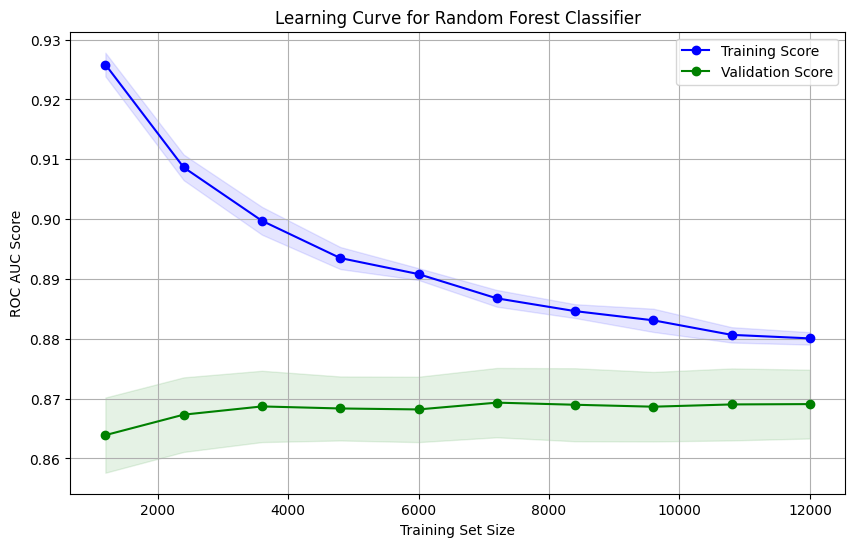

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold

stf = StratifiedKFold(n_splits=5)

randomforest_model = RandomForestClassifier(max_depth=5)
randomforest_res = learning_curve(
    randomforest_model, 
    X, 
    y, 
    cv=stf, 
    scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

def show_curve_plot(learning_curve_data):
    train_sizes, train_scores, val_scores = learning_curve_data

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o')
    plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='green', marker='o')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, 
                     color='blue', alpha=0.1)
    plt.fill_between(train_sizes, 
                     val_scores_mean - val_scores_std, 
                     val_scores_mean + val_scores_std, 
                     color='green', alpha=0.1)

    plt.title('Learning Curve for Random Forest Classifier')
    plt.xlabel('Training Set Size')
    plt.ylabel('ROC AUC Score')
    plt.legend()
    plt.grid()
    plt.show()
show_curve_plot(randomforest_res)